The goal of this notebook is to look into the weird batchiness of Craig's processed malaria dataset.

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [52]:
fname = '../7-24-17_Malaria_pos_grouped_data.csv'
fmeta = '../7-22-17_malaria_metadata.txt'
fmap = '../a_UPLC_POS_nmfi_and_bsi_diagnosis.txt'

df = pd.read_csv(fname)
meta = pd.read_csv(fmeta, sep='\t')
smap = pd.read_csv(fmap, sep='\t')
df.head()

,mz,mzmin,mzmax,rt,rtmin,rtmax,X1001_P,X1002_P,X1003_P,X1004_P,...,X1024_P,X1032_P,X1034_P,X1036_P,X1043_P,X1052_P,X1054_P,X1055_P,X1060_P,X1062_P
0,100.075385,100.074986,100.075519,129.794110,127.975656,132.153297,4.237393e+04,1.793318e+05,2.537722e+06,1.018450e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100.916388,100.916045,100.916718,45.296209,44.146884,47.819750,1.117877e+04,2.072998e+04,2.085269e+04,1.271782e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101.008038,101.007614,101.008242,38.931362,38.142080,39.498050,8.791114e+06,6.606203e+06,6.546796e+06,1.213610e+07,...,8.041071e+06,7.900345e+06,3.202084e+06,5.383539e+06,5.802213e+06,7.213738e+06,5.679684e+06,4.694471e+06,4.398948e+06,6.154062e+06
3,101.010206,101.009702,101.010503,38.950441,9.380345,40.465458,1.470092e+05,2.394147e+05,1.720617e+05,1.005815e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101.095582,101.095295,101.095724,973.599729,953.662750,992.645495,7.239135e+05,6.045111e+05,7.010945e+05,6.603425e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Make a new index of mz:rt
mz = df.loc[:,"mz"].astype('str')
rt = df.loc[:,"rt"].astype('str')
idx = mz+':'+rt
df.index = idx
# separate samples from xcms/camera things to make feature table
not_samples = ['mz', 'mzmin', 'mzmax', 'rt', 'rtmin', 'rtmax', 
               'isotopes', 'adduct']
samples_list = df.columns.difference(not_samples)
df = df[samples_list]
df.head()

,X1001_P,X1002_P,X1003_P,X1004_P,X1005_P,X1006_P,X1007_P,X1009_P,X1010_P,X1011_P,...,X1058_P,X1059_P,X1060_P,X1061_P,X1062_P,X1064_P,X1065_P,X1066_P,X1067_P,X1068_P
100.075385037:129.794110338,4.237393e+04,1.793318e+05,2.537722e+06,1.018450e+05,NaN,6.022011e+06,80937.967894,1.074974e+06,NaN,85548.195663,...,1.084650e+05,7.302046e+04,NaN,55035.774629,NaN,2.119995e+04,5.401507e+05,8.383617e+05,5.607158e+04,4.799944e+04
100.916387934:45.2962085188,1.117877e+04,2.072998e+04,2.085269e+04,1.271782e+04,NaN,2.381227e+04,30196.736697,4.242019e+04,NaN,16393.262555,...,1.874021e+04,1.381214e+04,NaN,11570.255388,NaN,1.026701e+04,9.418198e+03,2.514742e+03,2.913224e+04,8.366813e+03
101.008038057:38.9313623619,8.791114e+06,6.606203e+06,6.546796e+06,1.213610e+07,8.000061e+06,7.570907e+06,NaN,8.622414e+06,7.964780e+06,NaN,...,4.407517e+06,4.307285e+06,4.398948e+06,NaN,6.154062e+06,4.713707e+06,3.408583e+06,3.914906e+06,5.872846e+06,5.412721e+06
101.010206254:38.9504407341,1.470092e+05,2.394147e+05,1.720617e+05,1.005815e+07,NaN,2.271798e+05,262951.485859,7.958442e+06,NaN,222898.316594,...,1.448548e+05,3.742394e+06,NaN,228921.042353,NaN,3.629951e+06,3.498667e+06,9.803220e+04,2.210944e+05,4.396907e+06
101.095581825:973.599728626,7.239135e+05,6.045111e+05,7.010945e+05,6.603425e+05,NaN,6.390932e+05,661218.450699,6.540129e+05,NaN,641261.986404,...,6.687507e+05,6.533440e+05,NaN,531421.033591,NaN,6.268551e+05,6.152487e+05,6.184462e+05,6.690330e+05,6.336629e+05


In [54]:
meta.index = meta['Sample Name']
meta.head()

,Source Name,Sample Name,Characteristics[blood glucose],Unit,Characteristics[diff_basophils],Unit.1,Characteristics[diff_eosinophils],Unit.2,Characteristics[diff_monocytes],Unit.3,...,Unit.18,Characteristics[age],Unit.19,Characteristics[Gender],Characteristics[malaria rapid diagnostic test],Characteristics[clinical outcome],Characteristics[severe malnutrition],Characteristics[prior antimalaria treatment],Characteristics[prior antibiotic treatment],Factor Value[patient group]
Sample Name,,,,,,,,,,,,,,,,,,,,,
MCMA429,Patient 1,MCMA429,3.33,mg/dL,0.6,%,0.0,%,2,%,...,kg,6,months,male,positive,death,no,yes,no,malaria
MCMA430,Patient 2,MCMA430,6.99,mg/dL,0.3,%,0.0,%,10.8,%,...,kg,25,months,female,positive,survival,no,yes,yes,malaria
MCMA431,Patient 3,MCMA431,4.77,mg/dL,0.4,%,0.1,%,16,%,...,kg,12,months,female,positive,survival,no,no,no,malaria
MCMA433,Patient 4,MCMA433,9.05,mg/dL,0.2,%,0.3,%,10.3,%,...,kg,48,months,male,positive,survival,no,yes,yes,malaria
MCMA434,Patient 5,MCMA434,6.38,mg/dL,0.1,%,1.9,%,20.6,%,...,kg,6,months,male,negative,survival,no,yes,yes,non-malarial febrile illness


In [55]:
meta['Factor Value[patient group]'].unique()

array(['malaria', 'non-malarial febrile illness',
       'bacterial bloodstream infection'], dtype=object)

In [56]:
smap[['Sample Name', 'MS Assay Name']].head()

,Sample Name,MS Assay Name
0,MCMA429,1001_P
1,MCMA430,1002_P
2,MCMA431,1003_P
3,MCMA433,1004_P
4,MCMA434,1005_P


In [57]:
# Change columns in feature table to match sample name in metadata

# MS Assay Name to Sample Name
ms_to_sample = {i: j for i, j in zip(smap['MS Assay Name'], smap['Sample Name'])}

# Feature table column names to MS Assay Name
df_to_ms = {i: i.split('_')[0][1:] + '_P' for i in df.columns}

# Feature table column names to sample names
df_to_sample = [ms_to_sample[df_to_ms[i]] for i in df.columns]

In [58]:
print(len(df_to_sample), df.shape, meta.shape)


(60, (6857, 60), (61, 49))


In [59]:
df.columns = df_to_sample
df.head()

,MCMA429,MCMA430,MCMA431,MCMA433,MCMA434,MCMA435,MCMA436,MCMA442,MCMA443,MCMA444,...,MCMA560,MCMA562,MCMA564,MCMA565,MCMA566,MURB082,MURB085,MURB088,MURB092,MURB095
100.075385037:129.794110338,4.237393e+04,1.793318e+05,2.537722e+06,1.018450e+05,NaN,6.022011e+06,80937.967894,1.074974e+06,NaN,85548.195663,...,1.084650e+05,7.302046e+04,NaN,55035.774629,NaN,2.119995e+04,5.401507e+05,8.383617e+05,5.607158e+04,4.799944e+04
100.916387934:45.2962085188,1.117877e+04,2.072998e+04,2.085269e+04,1.271782e+04,NaN,2.381227e+04,30196.736697,4.242019e+04,NaN,16393.262555,...,1.874021e+04,1.381214e+04,NaN,11570.255388,NaN,1.026701e+04,9.418198e+03,2.514742e+03,2.913224e+04,8.366813e+03
101.008038057:38.9313623619,8.791114e+06,6.606203e+06,6.546796e+06,1.213610e+07,8.000061e+06,7.570907e+06,NaN,8.622414e+06,7.964780e+06,NaN,...,4.407517e+06,4.307285e+06,4.398948e+06,NaN,6.154062e+06,4.713707e+06,3.408583e+06,3.914906e+06,5.872846e+06,5.412721e+06
101.010206254:38.9504407341,1.470092e+05,2.394147e+05,1.720617e+05,1.005815e+07,NaN,2.271798e+05,262951.485859,7.958442e+06,NaN,222898.316594,...,1.448548e+05,3.742394e+06,NaN,228921.042353,NaN,3.629951e+06,3.498667e+06,9.803220e+04,2.210944e+05,4.396907e+06
101.095581825:973.599728626,7.239135e+05,6.045111e+05,7.010945e+05,6.603425e+05,NaN,6.390932e+05,661218.450699,6.540129e+05,NaN,641261.986404,...,6.687507e+05,6.533440e+05,NaN,531421.033591,NaN,6.268551e+05,6.152487e+05,6.184462e+05,6.690330e+05,6.336629e+05


In [60]:
discol = 'Factor Value[patient group]'
sample_colors = pd.DataFrame(meta.loc[df.columns, discol])

colormap = {'malaria': 'red', 'non-malarial febrile illness': 'blue', 'bacterial bloodstream infection': 'green'}
sample_colors['color'] = [colormap[i] for i in sample_colors[discol]]
sample_colors[discol].unique()

array(['malaria', 'non-malarial febrile illness',
       'bacterial bloodstream infection'], dtype=object)

In [61]:
toplot = np.log10(df.fillna(1).replace(0, 1))
top100feats = toplot.mean(axis=1).sort_values(ascending=False).index[0:100]

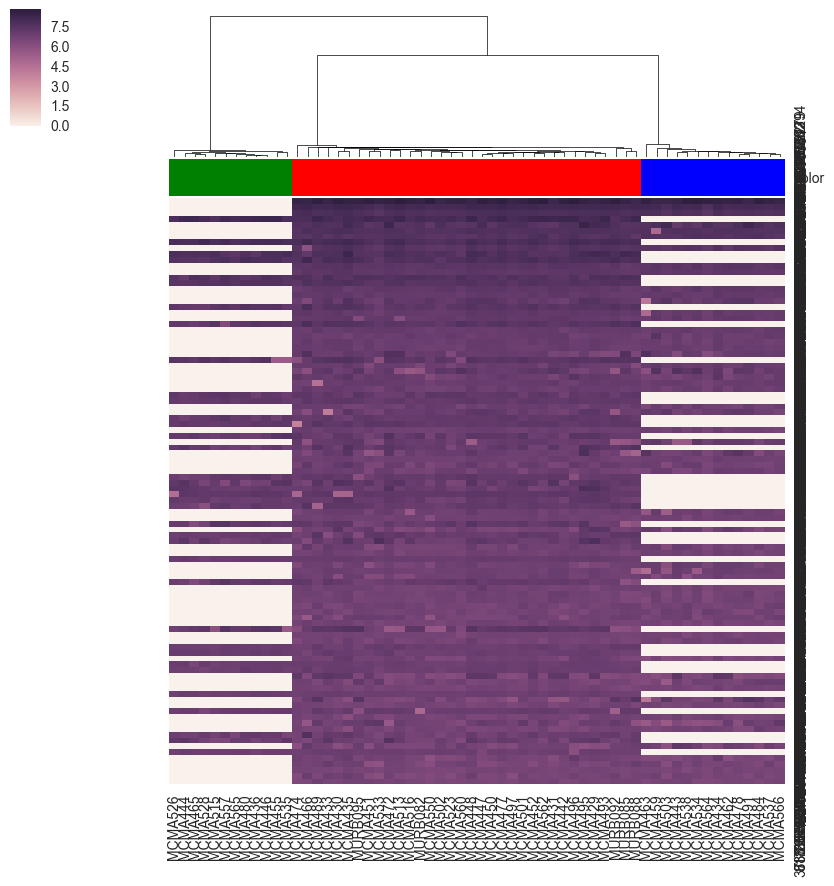

In [62]:
sns.clustermap(toplot.loc[top100feats], row_cluster=False, col_colors=sample_colors['color'])